In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import roc_auc_score, accuracy_score

from pyecharts.charts import *
from pyecharts.components import Table
from pyecharts import options as opts
from pyecharts.commons.utils import JsCode

In [3]:
data = pd.read_csv('abnormal_orders2.csv', index_col=0)

In [4]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [5]:
X['下单时间'] = X['下单时间'].apply(lambda x:x[0:2])
X.head()

,订单ID,下单时间,商品一级类别,商品所属渠道,商品ID,品牌,订单金额,商品销售数量,订单渠道,支付方式,下单用户ID,城市
0,4283851335,14,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,上海市
1,4276537082,14,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,合并支付,qq-3be293b,泉州市
2,4281111595,10,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市
3,3977175284,23,手机摄影数码,POP,8002237611,伊斯贝,990.0,100,主站,合并支付,swt6263122,宁德市
4,4106833871,16,家居日用,POP,8002212182,品道天元,8800.0,100,主站,合并支付,qq-edf69d7,深圳市


In [6]:
oe = OrdinalEncoder()
X = pd.DataFrame(oe.fit_transform(X))
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,99753.0,14.0,5.0,1.0,15907.0,227.0,3009.0,41.0,1.0,0.0,24870.0,5.0
1,56307.0,14.0,11.0,1.0,15431.0,1551.0,2970.0,40.0,1.0,0.0,50713.0,207.0
2,81338.0,10.0,2.0,1.0,18402.0,2049.0,621.0,40.0,1.0,0.0,46259.0,133.0
3,7028.0,23.0,5.0,1.0,19080.0,377.0,1499.0,40.0,1.0,0.0,62154.0,101.0
4,11982.0,16.0,3.0,1.0,18580.0,748.0,2799.0,40.0,1.0,0.0,56469.0,223.0


In [7]:
X.columns = data.iloc[:,:-1].columns
X.head()

,订单ID,下单时间,商品一级类别,商品所属渠道,商品ID,品牌,订单金额,商品销售数量,订单渠道,支付方式,下单用户ID,城市
0,99753.0,14.0,5.0,1.0,15907.0,227.0,3009.0,41.0,1.0,0.0,24870.0,5.0
1,56307.0,14.0,11.0,1.0,15431.0,1551.0,2970.0,40.0,1.0,0.0,50713.0,207.0
2,81338.0,10.0,2.0,1.0,18402.0,2049.0,621.0,40.0,1.0,0.0,46259.0,133.0
3,7028.0,23.0,5.0,1.0,19080.0,377.0,1499.0,40.0,1.0,0.0,62154.0,101.0
4,11982.0,16.0,3.0,1.0,18580.0,748.0,2799.0,40.0,1.0,0.0,56469.0,223.0


In [8]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=1412)

In [9]:
cv = KFold(n_splits=5,      # 1/5训练+4/5测试
          shuffle=True,     # 将数据集打乱
          random_state=1412)

In [10]:
rfc = RFC(n_estimators=200,
         random_state=1412)

In [11]:
acc = cross_val_score(rfc, Xtrain, Ytrain, cv=cv)

In [12]:
acc.mean()

0.8284710130387849

In [13]:
acc.var()

2.732280258186722e-06

In [14]:
auc = cross_val_score(rfc, Xtrain, Ytrain, cv = cv, scoring='roc_auc')

In [15]:
auc.mean()

0.8536282232497637

In [16]:
auc.var()

5.064067975533223e-06

In [17]:
rfc = RFC(n_estimators=200,
         random_state=1412)

In [18]:
Ytest_pred = rfc.fit(Xtrain,Ytrain).predict(Xtest)

In [19]:
accuracy_score(Ytest, Ytest_pred)

0.8267360670305954

In [20]:
roc_auc_score(Ytest, Ytest_pred)

0.6790062441649072

### 2. 分割训练集与测试集

In [21]:
data['订单ID'].count()

131282

In [22]:
orderid = data['订单ID'].unique()
len(orderid)

114207

##### step1：分割训练ID和测试集ID

In [23]:
import random
random.seed(1412)

In [24]:
test_id = random.sample(orderid.tolist(), int(len(orderid)*0.3))
len(test_id)

34262

In [25]:
train_id = orderid.copy().tolist()
for i in test_id:
    train_id.remove(i)
    
len(train_id)

79945

#### step2：根据分割出来的订单ID，将样本分割为训练集和测试集

In [26]:
data['分割'] = 'train'

In [27]:
for i in test_id:
    data.loc[data['订单ID']==i,'分割']='test'

In [30]:
train = data.loc[data['分割'] == 'train',:]
test = data.loc[data['分割'] == 'test',:]

#### step3：对训练集和测试集的后续处理

In [31]:
# 重新索引
train.index = range(train.shape[0])
test.index = range(test.shape[0])

In [32]:
# 删除“分割”列
train.drop(columns='分割',inplace=True)
test.drop(columns='分割',inplace=True)

C:\Users\zx\AppData\Local\Temp\ipykernel_11744\3079550862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(columns='分割',inplace=True)
C:\Users\zx\AppData\Local\Temp\ipykernel_11744\3079550862.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(columns='分割',inplace=True)


In [33]:
# 将标签放到第一列
Xtrain = train.iloc[:,:-1]
Ytrain = train.iloc[:,-1]
Xtest = test.iloc[:,:-1]
Ytest = test.iloc[:,-1]

train = pd.concat([Ytrain,Xtrain],axis=1)
test = pd.concat([Ytest,Xtest],axis=1)

In [34]:
train.head()

,异常,订单ID,下单时间,商品一级类别,商品所属渠道,商品ID,品牌,订单金额,商品销售数量,订单渠道,支付方式,下单用户ID,城市
0,1,4283851335,14:09:49,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,上海市
1,1,4281111595,10:44:46,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市
2,0,4106833871,16:47:34,家居日用,POP,8002212182,品道天元,8800.0,100,主站,合并支付,qq-edf69d7,深圳市
3,0,4253622967,21:15:59,电脑办公打印文仪,POP,8001748897,清华同方,880.0,100,主站,合并支付,benson2570,宿迁市
4,0,4276159555,16:49:49,家居日用,GO,1000341307,乐扣乐扣,4900.0,100,主站,合并支付,dakehu_zy,西安市


In [35]:
#将训练集与测试集单独保存
train.to_csv('train_bf.csv')
test.to_csv('test_bf.csv')

### 异常交易VS普通订单：下单时间有区别吗？

In [36]:
train = pd.read_csv('train_bf.csv',index_col=0)
test = pd.read_csv('test_bf.csv',index_col=0)

In [37]:
train.head()

,异常,订单ID,下单时间,商品一级类别,商品所属渠道,商品ID,品牌,订单金额,商品销售数量,订单渠道,支付方式,下单用户ID,城市
0,1,4283851335,14:09:49,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,上海市
1,1,4281111595,10:44:46,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市
2,0,4106833871,16:47:34,家居日用,POP,8002212182,品道天元,8800.0,100,主站,合并支付,qq-edf69d7,深圳市
3,0,4253622967,21:15:59,电脑办公打印文仪,POP,8001748897,清华同方,880.0,100,主站,合并支付,benson2570,宿迁市
4,0,4276159555,16:49:49,家居日用,GO,1000341307,乐扣乐扣,4900.0,100,主站,合并支付,dakehu_zy,西安市


#### 关系探索

In [38]:
import time
import datetime

In [39]:
train['下单时间'][0]

'14:09:49'

In [40]:
# 将时间字符串按小时数提取为单独的Series

In [41]:
train['下单时间'][0][:2]

'14'

In [42]:
Hour = train.loc[:,'下单时间'].apply(lambda x: int(x[:2]))

In [46]:
#计算每个区间内的交易数量

In [47]:
OrderTime_ab = Hour[train['异常'] == 1].value_counts()

In [48]:
OrderTime_normal = Hour[train['异常'] == 0].value_counts()

In [49]:
import seaborn as sns

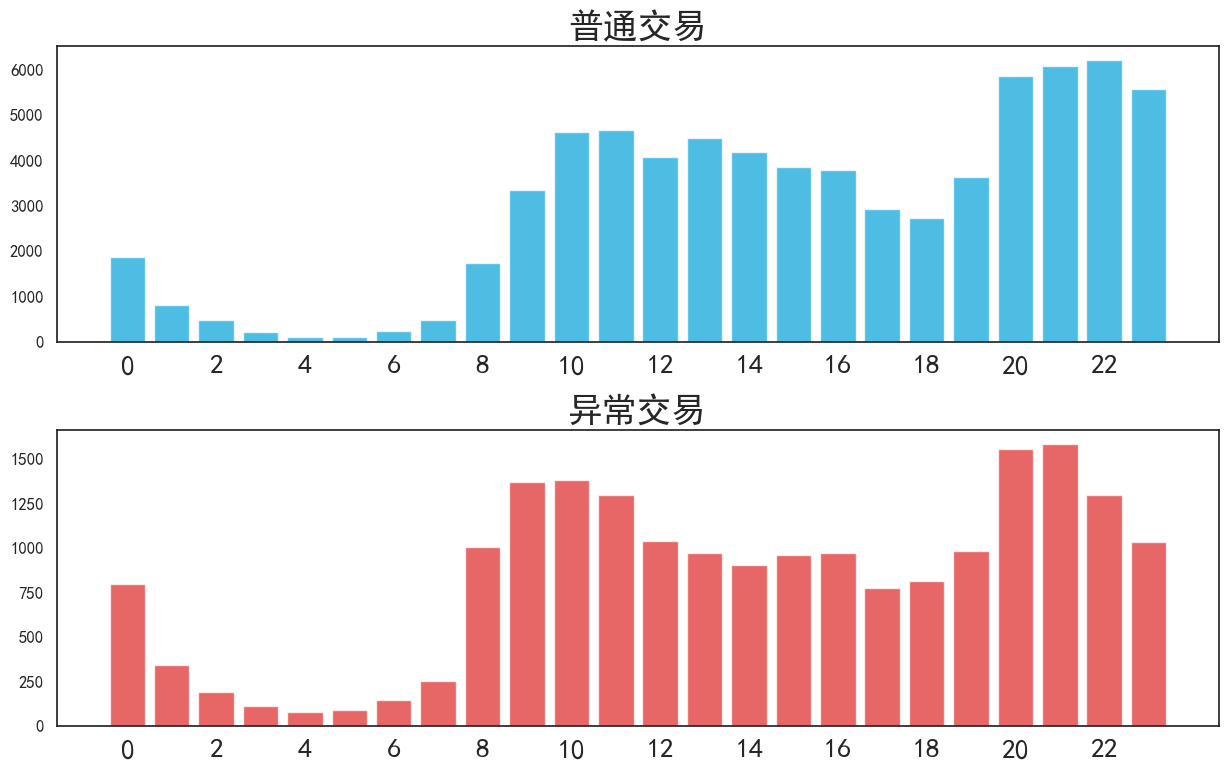

In [52]:
plt.figure(figsize=(15,9),dpi=100)
sns.set(style='white',font='Simhei',font_scale=1.1)

plt.subplot(211)
plt.bar(OrderTime_normal.index,OrderTime_normal.values,color = '#01a2d9',alpha=0.7)
plt.title('普通交易',fontsize=25)
plt.xticks(ticks=range(0,24,2),fontsize = 20)

plt.subplot(212)
plt.bar(OrderTime_ab.index,OrderTime_ab.values,color = '#dc2624',alpha=0.7)
plt.title('异常交易',fontsize=25)
plt.xticks(ticks=range(0,24,2),fontsize = 20)

plt.subplots_adjust(hspace=0.3)
plt.show()

异常交易与普通订单的下单时间并无显著差异，下单时间很可能与交易是否异常无关

保留这个特征，并将其转化为小时和分钟。其中小时按24小时进行编码，分钟按前半小时、后半小时分别编码为0与1

#### 特征编码

In [53]:
train['下单时间']

0        14:09:49
1        10:44:46
2        16:47:34
3        21:15:59
4        16:49:49
           ...   
91863    23:56:01
91864    23:57:24
91865    23:54:34
91866    23:55:06
91867    23:58:59
Name: 下单时间, Length: 91868, dtype: object

In [56]:
train['下单分钟'] = train['下单时间'].apply(lambda x: int(int(x[3:5]) > 30))
train['下单小时'] = train['下单时间'].apply(lambda x: int(x[:2]))

test['下单分钟'] = test['下单时间'].apply(lambda x: int(int(x[3:5]) > 30))
test['下单小时'] = test['下单时间'].apply(lambda x: int(x[:2]))

In [57]:
train.head()

,异常,订单ID,下单时间,商品一级类别,商品所属渠道,商品ID,品牌,订单金额,商品销售数量,订单渠道,支付方式,下单用户ID,城市,下单分钟,下单小时
0,1,4283851335,14:09:49,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,上海市,0,14
1,1,4281111595,10:44:46,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市,1,10
2,0,4106833871,16:47:34,家居日用,POP,8002212182,品道天元,8800.0,100,主站,合并支付,qq-edf69d7,深圳市,1,16
3,0,4253622967,21:15:59,电脑办公打印文仪,POP,8001748897,清华同方,880.0,100,主站,合并支付,benson2570,宿迁市,0,21
4,0,4276159555,16:49:49,家居日用,GO,1000341307,乐扣乐扣,4900.0,100,主站,合并支付,dakehu_zy,西安市,1,16


#### 删除下单时间

In [58]:
train.drop(columns='下单时间',inplace=True)
test.drop(columns='下单时间',inplace=True)

#### 将处理后的数据单独保存

In [59]:
train.to_csv('train.csv')
test.to_csv('test.csv')

### 4、支付方式

In [60]:
train['支付方式'].value_counts()

合并支付    71893
货到付款    18321
当当支付     1226
在线支付      290
账户余额      138
Name: 支付方式, dtype: int64

在数据集中，共有五大类支付方式，而五大类支付方式下的订单异常风险不同。

异常风险的关键评估指标：异常率

异常率是指异常交易/全部交易的比例，异常率高则说明异常风险越高。对于每个特征，我们都可以计算其不同类别下的异常率，以确定特定类别与异常风险的关系

In [61]:
train.groupby('支付方式')['异常'].mean()

支付方式
合并支付    0.275173
在线支付    0.251724
当当支付    0.044861
账户余额    0.028986
货到付款    0.000000
Name: 异常, dtype: float64

In [62]:
train.groupby('支付方式')['异常'].sum()

支付方式
合并支付    19783
在线支付       73
当当支付       55
账户余额        4
货到付款        0
Name: 异常, dtype: int64

In [63]:
train.groupby('支付方式')['异常'].count()

支付方式
合并支付    71893
在线支付      290
当当支付     1226
账户余额      138
货到付款    18321
Name: 异常, dtype: int64

In [64]:
train.groupby('支付方式')['异常'].sum() / train.groupby('支付方式')['异常'].count()

支付方式
合并支付    0.275173
在线支付    0.251724
当当支付    0.044861
账户余额    0.028986
货到付款    0.000000
Name: 异常, dtype: float64

In [67]:
def GroupByFeature(column, train, test, newcolumn):
    #使用训练集数据创建字典
    dic = dict(train.groupby(column)['异常'].mean())
    
    # 建立新特征
    train[newcolumn] = train[column].map(dic)
    test[newcolumn] = test[column].map(dic)
    
    return train, test

In [68]:
train, test = GroupByFeature('支付方式',train, test, '支付方式异常率')

In [69]:
train.head()

,异常,订单ID,商品一级类别,商品所属渠道,商品ID,品牌,订单金额,商品销售数量,订单渠道,支付方式,下单用户ID,城市,下单分钟,下单小时,支付方式异常率
0,1,4283851335,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,上海市,0,14,0.275173
1,1,4281111595,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市,1,10,0.275173
2,0,4106833871,家居日用,POP,8002212182,品道天元,8800.0,100,主站,合并支付,qq-edf69d7,深圳市,1,16,0.275173
3,0,4253622967,电脑办公打印文仪,POP,8001748897,清华同方,880.0,100,主站,合并支付,benson2570,宿迁市,0,21,0.275173
4,0,4276159555,家居日用,GO,1000341307,乐扣乐扣,4900.0,100,主站,合并支付,dakehu_zy,西安市,1,16,0.275173


#### 特征编码

In [70]:
def encodePay(column, train, test):
    '本函数用于转化支付方式'
    
    dic = {}
    feature = train.loc[:,column]
    unique_ = np.sort(feature.unique())
    for code, category in enumerate(unique_):
        dic[category] = code
        
    #编码训练集
    train[column] = train[column].map(dic)
    
    #使用训练集上生成的字典转化测试集
    test[column] = test[column].map(dic)
    
    return train, test

In [71]:
train, test = encodePay('支付方式',train,test)

In [72]:
train['支付方式']

0        0
1        0
2        0
3        0
4        0
        ..
91863    4
91864    4
91865    0
91866    0
91867    0
Name: 支付方式, Length: 91868, dtype: int64

### 城市：收货地点的风险评估

使用异常率来进行相关的评估，城市的类别虽然只有365个，但还是远远超出一般离散型特征的分类个数，如果按照这个数量的类别进行风险评估，很难看出有用的趋势。我们需要降低城市类别数量再进行风险评估，将365个城市按照省进行分类，并按照省份进行聚合

In [73]:
train['城市'].value_counts()

北京市        9578
上海市        4514
广州市        4157
深圳市        3717
天津市        2250
           ... 
昌都地区          1
广东省其他城市       1
四川省其他城市       1
神农架林区         1
福建省其他城市       1
Name: 城市, Length: 362, dtype: int64

#### 按省份进行处理

In [74]:
ChinaCity = pd.read_excel('ChinaCity.xls',index_col=1)
ChinaCity

,省份
市级,
北京市,北京市
天津市,天津市
石家庄市,河北省
唐山市,河北省
秦皇岛市,河北省
...,...
辽宁省其他城市,辽宁省
四川省其他城市,四川省
广东省其他城市,广东省


In [75]:
# 化为Series，方便字典的建立
ChinaCity['省份']

市级
北京市        北京市
天津市        天津市
石家庄市       河北省
唐山市        河北省
秦皇岛市       河北省
          ... 
辽宁省其他城市    辽宁省
四川省其他城市    四川省
广东省其他城市    广东省
云南省其他城市    云南省
福建省其他城市    福建省
Name: 省份, Length: 409, dtype: object

In [77]:
train['省份'] = train['城市'].map(dict(ChinaCity['省份']))

In [78]:
train.head()

,异常,订单ID,商品一级类别,商品所属渠道,商品ID,品牌,订单金额,商品销售数量,订单渠道,支付方式,下单用户ID,城市,下单分钟,下单小时,支付方式异常率,省份
0,1,4283851335,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,0,dakehu_zy,上海市,0,14,0.275173,上海市
1,1,4281111595,家具建材,POP,8002199518,纬度空间,100.0,100,主站,0,nonscorpio,广州市,1,10,0.275173,广东省
2,0,4106833871,家居日用,POP,8002212182,品道天元,8800.0,100,主站,0,qq-edf69d7,深圳市,1,16,0.275173,广东省
3,0,4253622967,电脑办公打印文仪,POP,8001748897,清华同方,880.0,100,主站,0,benson2570,宿迁市,0,21,0.275173,江苏省
4,0,4276159555,家居日用,GO,1000341307,乐扣乐扣,4900.0,100,主站,0,dakehu_zy,西安市,1,16,0.275173,陕西省


In [79]:
# 由于匹配数据不是我们自己编写，一定要确认map之后没有缺失值
train['省份'].isnull().sum()

0

In [81]:
# 计算每个省份的异常率
train.groupby(['省份'])['异常'].mean().sort_values(ascending=False)

省份
青海省         0.382979
内蒙古自治区      0.309628
西藏自治区       0.272727
山西省         0.256000
甘肃省         0.255043
海南省         0.250318
江西省         0.245702
北京市         0.241595
陕西省         0.236769
河北省         0.236292
宁夏回族自治区     0.233161
重庆市         0.232558
新疆维吾尔自治区    0.231325
河南省         0.225344
吉林省         0.223310
广东省         0.222260
浙江省         0.219894
山东省         0.217832
湖北省         0.217329
福建省         0.215807
天津市         0.215111
江苏省         0.212617
辽宁省         0.211465
云南省         0.207724
湖南省         0.207155
上海市         0.206912
广西壮族自治区     0.201106
四川省         0.190524
黑龙江省        0.181818
安徽省         0.159470
贵州省         0.072279
Name: 异常, dtype: float64

In [82]:
# 对train和test创造出省份这个特征
train['省份'] = train['城市'].map(dict(ChinaCity['省份']))
test['省份'] = test['城市'].map(dict(ChinaCity['省份']))

In [83]:
def GroupByFeature(column, train, test, newcolumn):
    #使用训练集数据创建字典
    dic = dict(train.groupby(column)['异常'].mean())
    #建立新特征
    train[newcolumn] = train[column].map(dic)
    test[newcolumn] = test[column].map(dic)
    
    return train, test

In [84]:
train, test = GroupByFeature('省份',train, test, '省份异常率')

In [85]:
train.head()

,异常,订单ID,商品一级类别,商品所属渠道,商品ID,品牌,订单金额,商品销售数量,订单渠道,支付方式,下单用户ID,城市,下单分钟,下单小时,支付方式异常率,省份,省份异常率
0,1,4283851335,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,0,dakehu_zy,上海市,0,14,0.275173,上海市,0.206912
1,1,4281111595,家具建材,POP,8002199518,纬度空间,100.0,100,主站,0,nonscorpio,广州市,1,10,0.275173,广东省,0.222260
2,0,4106833871,家居日用,POP,8002212182,品道天元,8800.0,100,主站,0,qq-edf69d7,深圳市,1,16,0.275173,广东省,0.222260
3,0,4253622967,电脑办公打印文仪,POP,8001748897,清华同方,880.0,100,主站,0,benson2570,宿迁市,0,21,0.275173,江苏省,0.212617
4,0,4276159555,家居日用,GO,1000341307,乐扣乐扣,4900.0,100,主站,0,dakehu_zy,西安市,1,16,0.275173,陕西省,0.236769


In [86]:
train.isnull().sum().sum()

0

In [87]:
test.isnull().sum().sum()

6

#### 特征编码

现在有两个特征需要编码，一个是城市，另一个是省份

In [88]:
def encodeCityProvince(column, train, test):
    '本函数用于编码城市与省份'
    
    dic = {}
    feature = train.loc[:,column]
    unique_ = np.sort(feature.unique())
    for code, category in enumerate(unique_):
        dic[category] = code
        
    #编码训练集
    train[column] = train[column].map(dic)
    
    #使用训练集上生成的字典转化测试集
    test[column] = test[column].map(dic)
    
    return train, test

In [89]:
for column in ['城市','省份']:
    train, test = encodeCityProvince(column,train, test)

In [90]:
train.head()

,异常,订单ID,商品一级类别,商品所属渠道,商品ID,品牌,订单金额,商品销售数量,订单渠道,支付方式,下单用户ID,城市,下单分钟,下单小时,支付方式异常率,省份,省份异常率
0,1,4283851335,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,0,dakehu_zy,5,0,14,0.275173,0,0.206912
1,1,4281111595,家具建材,POP,8002199518,纬度空间,100.0,100,主站,0,nonscorpio,131,1,10,0.275173,11,0.222260
2,0,4106833871,家居日用,POP,8002212182,品道天元,8800.0,100,主站,0,qq-edf69d7,220,1,16,0.275173,11,0.222260
3,0,4253622967,电脑办公打印文仪,POP,8001748897,清华同方,880.0,100,主站,0,benson2570,115,0,21,0.275173,14,0.212617
4,0,4276159555,家居日用,GO,1000341307,乐扣乐扣,4900.0,100,主站,0,dakehu_zy,289,1,16,0.275173,28,0.236769


In [91]:
# 由于特征中类别数量太多，分割训练集测试集后，测试集中可能出现训练集中从未见过的类别

In [92]:
test.isnull().sum()

异常         0
订单ID       0
商品一级类别     0
商品所属渠道     0
商品ID       0
品牌         0
订单金额       0
商品销售数量     0
订单渠道       0
支付方式       0
下单用户ID     0
城市         3
下单分钟       0
下单小时       0
支付方式异常率    0
省份         3
省份异常率      3
dtype: int64

In [93]:
train['城市'].max()

361

In [95]:
test.loc[test['城市'].isnull(),'城市'] = 362

In [97]:
train['省份'].max()

30

In [98]:
test.loc[test['省份'].isnull(),'省份'] = 31

In [99]:
train['省份异常率'].max()

0.3829787234042553

In [100]:
test.loc[test['省份异常率'].isnull(),'省份异常率'] = 0.3829787234042553

#### 商品一级类别、订单渠道以及商品渠道

In [101]:
for i in ['商品一级类别', '订单渠道', '商品所属渠道']:
    train, test = GroupByFeature(i, train, test, i + '异常率')

In [102]:
train.head()

,异常,订单ID,商品一级类别,商品所属渠道,商品ID,品牌,订单金额,商品销售数量,订单渠道,支付方式,下单用户ID,城市,下单分钟,下单小时,支付方式异常率,省份,省份异常率,商品一级类别异常率,订单渠道异常率,商品所属渠道异常率
0,1,4283851335,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,0,dakehu_zy,5,0,14,0.275173,0,0.206912,0.261565,0.167849,0.294727
1,1,4281111595,家具建材,POP,8002199518,纬度空间,100.0,100,主站,0,nonscorpio,131,1,10,0.275173,11,0.222260,0.262840,0.167849,0.294727
2,0,4106833871,家居日用,POP,8002212182,品道天元,8800.0,100,主站,0,qq-edf69d7,220,1,16,0.275173,11,0.222260,0.235079,0.167849,0.294727
3,0,4253622967,电脑办公打印文仪,POP,8001748897,清华同方,880.0,100,主站,0,benson2570,115,0,21,0.275173,14,0.212617,0.215029,0.167849,0.294727
4,0,4276159555,家居日用,GO,1000341307,乐扣乐扣,4900.0,100,主站,0,dakehu_zy,289,1,16,0.275173,28,0.236769,0.235079,0.167849,0.178732


对原特征进行处理：特征编码

In [103]:
def encode(column, train, test):
    
    dic = {}
    feature = train.loc[:,column]
    unique_ = np.sort(feature.unique())
    for code, category in enumerate(unique_):
        dic[category] = code
        
    #编码训练集
    train[column] = train[column].map(dic)
    
    #使用训练集上生成的字典转化测试集
    test[column] = test[column].map(dic)
    
    return train, test

In [104]:
for column in ['商品一级类别', '订单渠道', '商品所属渠道']:
    train, test = encode(column,train, test)

In [105]:
train.head()

,异常,订单ID,商品一级类别,商品所属渠道,商品ID,品牌,订单金额,商品销售数量,订单渠道,支付方式,下单用户ID,城市,下单分钟,下单小时,支付方式异常率,省份,省份异常率,商品一级类别异常率,订单渠道异常率,商品所属渠道异常率
0,1,4283851335,5,1,8002042497,三星,766000.0,200,1,0,dakehu_zy,5,0,14,0.275173,0,0.206912,0.261565,0.167849,0.294727
1,1,4281111595,2,1,8002199518,纬度空间,100.0,100,1,0,nonscorpio,131,1,10,0.275173,11,0.222260,0.262840,0.167849,0.294727
2,0,4106833871,3,1,8002212182,品道天元,8800.0,100,1,0,qq-edf69d7,220,1,16,0.275173,11,0.222260,0.235079,0.167849,0.294727
3,0,4253622967,10,1,8001748897,清华同方,880.0,100,1,0,benson2570,115,0,21,0.275173,14,0.212617,0.215029,0.167849,0.294727
4,0,4276159555,3,0,1000341307,乐扣乐扣,4900.0,100,1,0,dakehu_zy,289,1,16,0.275173,28,0.236769,0.235079,0.167849,0.178732


用户ID、商品ID以及品牌（离散、类别多）

In [107]:
for i in ["下单用户ID","商品ID","品牌"]:
    cate = len(train[i].unique())
    print(i, cate)

下单用户ID 58488
商品ID 17252
品牌 2507


通常情况下，下单用户ID、商品ID这种带有唯一性的特征，都可以采取直接删除的处理方法。但在特殊的预测情况下，三者可能与交易异常有关系，需做保留

用户ID、商品ID、品牌的特点：

①相较于之前处理的特征（商品一级类别、商品所属渠道、支付方式等）其各特征下的类别拥有交易量足够、可以衡量风险的类型；但用户ID、商品ID、品牌，这三者因为其特征下的类别较多，拥有交易过少无法判断的特点。为此，我们像先前一样新增特征“XX异常率”，但不同的是，需对未达到阈值（人为设定）的异常率特征记为-1
②用户ID、商品ID、品牌因为类别多，其特征拥有部分类别只存在于训练集，不存在与测试集的特点，为此在新增特征“XX异常率”时，这些在测试集未出现的类别对应的异常率记为-1；在特征编码时，将对这些类目手动新增

#### 特征探索

下单用户ID ：阈值设为下单次数≥X次

In [108]:
# 下单人数
len(train['下单用户ID'].unique())

58488

In [109]:
# 下单2次以上的人数
(train.groupby('下单用户ID')['订单ID'].count() >= 2).sum()

14351

In [110]:
# 每个客户的下单异常率
train.groupby('下单用户ID')['异常'].mean()

下单用户ID
0002jimmy     0.000000
000bktx       0.000000
000miaojua    0.333333
0010200343    0.166667
001181yyy     0.000000
                ...   
黄叶211         0.000000
黄炫熙           0.000000
黄育武           1.000000
黑星星           0.000000
龚大帅           0.000000
Name: 异常, Length: 58488, dtype: float64

In [111]:
#下单2次以上的用户的异常率：
MultipleBuyRatio = train.groupby('下单用户ID')['异常'].mean()[train.groupby('下单用户ID')['订单ID'].count() >= 2]
MultipleBuyRatio

下单用户ID
000miaojua    0.333333
0010200343    0.166667
007xiaoxit    0.000000
010cathy      0.166667
020320623_    0.333333
                ...   
陈锐123         0.333333
雪芦翠鸟          0.500000
雯胖胖           0.000000
风儿98765432    0.500000
黑星星           0.000000
Name: 异常, Length: 14351, dtype: float64

In [113]:
MultipleBuyRatio.describe([0.6, 0.7, 0.8 ,0.9, 0.99])

count    14351.000000
mean         0.258921
std          0.347363
min          0.000000
50%          0.000000
60%          0.250000
70%          0.500000
80%          0.500000
90%          1.000000
99%          1.000000
max          1.000000
Name: 异常, dtype: float64

结论：下单2次以上的用户中，50%以上的用户从未有过异常订单

In [114]:
# 商品ID：阈值设为销售数量≥X件
train.groupby('商品ID')['商品销售数量'].sum().describe()

count    17252.000000
mean         6.321528
std         37.765090
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       2606.000000
Name: 商品销售数量, dtype: float64

均值为6.32，我们可以规定，销售数量小于10个的商品，都是交易过少无法判断其异常风险的商品。对于交易数量大于10的商品，我们计算异常率

In [115]:
# 商品销售数量10件以上的商品异常率：
ProductIDRatio = train.groupby('商品ID')['异常'].mean()[train.groupby('商品ID')['商品销售数量'].sum()>=10]
ProductIDRatio.describe()

count    1748.000000
mean        0.229465
std         0.208118
min         0.000000
25%         0.083333
50%         0.176471
75%         0.324169
max         1.000000
Name: 异常, dtype: float64

结论：在商品销售≥10件的商品中，有75%的商品其异常率都低于32%，符合业务逻辑

In [116]:
# 品牌：阈值设为销售数量≥X件
train.groupby('品牌')['商品销售数量'].sum().describe()

count    2507.000000
mean       43.501795
std       197.462143
min         1.000000
25%         2.000000
50%         5.000000
75%        18.000000
max      3904.000000
Name: 商品销售数量, dtype: float64

In [117]:
BrandIDRatio = train.groupby('品牌')['异常'].mean()[train.groupby('品牌')['商品销售数量'].sum()>=10]
BrandIDRatio.describe()

count    882.000000
mean       0.246267
std        0.167831
min        0.000000
25%        0.133333
50%        0.217391
75%        0.333333
max        1.000000
Name: 异常, dtype: float64

结论：在商品销售≥10件的商品中，有75%的商品其异常率都低于33%，符合业务逻辑

#### 我们可以将用户异常率、商品异常率、品牌异常率作为聚合特征，放入我们的特征矩阵。

In [118]:
# 构建训练字典
df = pd.DataFrame(index = train['下单用户ID'].unique())
df['用户异常率'] = -1
df.head()

,用户异常率
dakehu_zy,-1
nonscorpio,-1
qq-edf69d7,-1
benson2570,-1
qq-3be293b,-1


In [119]:
df.loc[MultipleBuyRatio.index,'用户异常率'] = MultipleBuyRatio
df.head()

,用户异常率
dakehu_zy,0.133333
nonscorpio,0.333333
qq-edf69d7,0.000000
benson2570,-1.000000
qq-3be293b,-1.000000


In [120]:
dic = dict(df['用户异常率'])

In [121]:
# 对训练集映射字典
train['用户异常率'] = train['下单用户ID'].map(dic)
train['用户异常率']

0        0.133333
1        0.333333
2        0.000000
3       -1.000000
4        0.133333
           ...   
91863    0.000000
91864    0.000000
91865    0.214286
91866    0.000000
91867   -1.000000
Name: 用户异常率, Length: 91868, dtype: float64

In [123]:
# 通过测试集补充字典
dic = {}
for i in test['下单用户ID']:
    if i in MultipleBuyRatio.index:
        dic[i] = MultipleBuyRatio[i]
    else:
        dic[i] = -1

In [124]:
# 对测试集映射字典
test['用户异常率'] = test['下单用户ID'].map(dic)

In [125]:
test.head()

,异常,订单ID,商品一级类别,商品所属渠道,商品ID,品牌,订单金额,商品销售数量,订单渠道,支付方式,...,城市,下单分钟,下单小时,支付方式异常率,省份,省份异常率,商品一级类别异常率,订单渠道异常率,商品所属渠道异常率,用户异常率
0,1,4276537082,11,1,8001992420,樱花,19900.0,100,1,0,...,204.0,0,14,0.275173,23.0,0.215807,0.201848,0.167849,0.294727,-1.000000
1,0,3977175284,5,1,8002237611,伊斯贝,990.0,100,1,0,...,101.0,0,23,0.275173,23.0,0.215807,0.261565,0.167849,0.294727,-1.000000
2,0,4245023523,2,1,8002199518,纬度空间,100.0,100,1,0,...,131.0,1,10,0.275173,11.0,0.222260,0.262840,0.167849,0.294727,0.333333
3,0,4284515355,9,1,8001873245,佳星,21450.0,50,1,0,...,131.0,1,15,0.275173,11.0,0.222260,0.193856,0.167849,0.294727,-1.000000
4,0,4284735147,3,1,8002202146,奕辰,1950.0,50,1,0,...,95.0,0,17,0.275173,6.0,0.215111,0.235079,0.167849,0.294727,-1.000000


In [126]:
# 将上述代码打包成函数：

def GroupByFeature2(column, train, test, newcolumn, ratio):

    # 构建训练集字典
    df = pd.DataFrame(index = train[column].unique())
    df[newcolumn] = -1  # 默认值设为-1
    df.loc[ratio.index, newcolumn] = ratio

    # 训练集字典映射
    train[newcolumn] = train[column].map(dict(df[newcolumn]))

    # 测试集构建字典：出现在训练集直接赋值，未出现的赋为-1
    dic = {}
    for i in test[column]:
        if i in ratio.index:
            dic[i] = ratio[i]
        else:
            dic[i] = -1

    # 测试集字典映射
    test[newcolumn] = test[column].map(dic)

    return train, test

In [127]:
# 对商品ID和品牌进行处理
train, test = GroupByFeature2("商品ID",train,test,"商品异常率",ProductIDRatio)
train, test = GroupByFeature2("品牌",train,test,"品牌异常率",BrandIDRatio)

##### 对原特征进行处理：特征编码

In [128]:
for column in ["下单用户ID", "商品ID","品牌"]:
    train, test = encode(column, train, test)

### 特征工程六：订单金额与销售数量（连续）

#### step1：特征探索

In [129]:
ab = train.loc[train['异常'] == 1, '订单金额']
ab.describe()

count     19915.000000
mean        902.707100
std        5790.468611
min           0.500000
25%          49.000000
50%         118.000000
75%         688.000000
max      766000.000000
Name: 订单金额, dtype: float64

In [131]:
normal = train.loc[train['异常'] == 0, '订单金额']
normal.describe()

count     71953.000000
mean        606.823929
std        2160.500859
min           0.500000
25%          21.900000
50%          89.900000
75%         338.000000
max      383000.000000
Name: 订单金额, dtype: float64

异常交易的订单金额均值高、方差也高，从整体来说都表现出比普通交易更昂贵的属性

In [132]:
import seaborn as sns

F:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


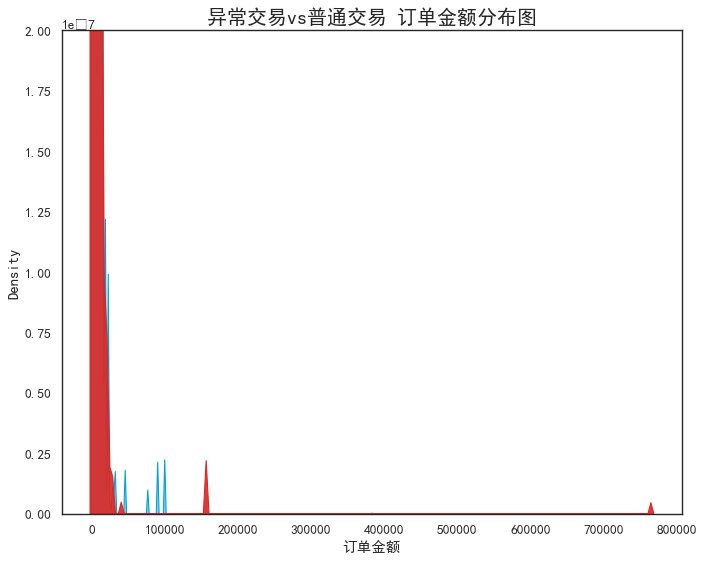

In [133]:
plt.figure(figsize=(10, 8), dpi=80)
sns.kdeplot(normal,
            shade=True,
            color="#01a2d9",
            label="普通交易",
            alpha=.5)
sns.kdeplot(ab,
            shade=True,
            color="#dc2624",
            label="异常交易",
            alpha=.9)

#风格与装饰
sns.set(style="whitegrid",font="SimHei", font_scale=1.1)
plt.title("异常交易vs普通交易 订单金额分布图",fontsize=18)
#plt.yticks([])
plt.ylim((0,0.0000002))
plt.show()

#### step2：是否新增特征

使用Kmeans对金额进行分箱

In [134]:
from sklearn.preprocessing import c as KBD

In [135]:
enc = KBD(n_bins = 10
            , encode = 'ordinal'
            , strategy = 'kmeans')
enc = enc.fit(pd.DataFrame(train['订单金额']))

train['金额分箱'] = enc.transform(pd.DataFrame(train['订单金额']))
test['金额分箱'] = enc.transform(pd.DataFrame(test['订单金额']))

In [137]:
df = pd.DataFrame(index = train.groupby(['金额分箱'])['订单金额'].max().index)

df['下界'] = train.groupby(['金额分箱'])['订单金额'].min()
df['上界'] = train.groupby(['金额分箱'])['订单金额'].max()
df['均值'] = round(train.groupby(['金额分箱'])['订单金额'].mean())

df

,下界,上界,均值
金额分箱,,,
0.0,0.5,954.0,136.0
1.0,956.0,2970.0,1775.0
2.0,2980.0,6638.0,4165.0
3.0,6666.0,12999.0,9129.0
4.0,13189.0,23998.0,16873.0
5.0,25790.0,45490.0,32339.0
6.0,71980.0,99840.0,85477.0
7.0,155999.0,155999.0,155999.0
8.0,383000.0,383000.0,383000.0


In [138]:
# 新增“分箱均值”
dic = dict(train.groupby('金额分箱')['订单金额'].mean())

train['分箱均值'] = train['金额分箱'].map(dic)
test['分箱均值'] = test['金额分箱'].map(dic)

In [139]:
# 新增“分箱异常率”
dic = dict(train.groupby('金额分箱')['异常'].mean())

train['分箱异常率'] = train['金额分箱'].map(dic)
test['分箱异常率'] = test['金额分箱'].map(dic)

In [140]:
train.head()

,异常,订单ID,商品一级类别,商品所属渠道,商品ID,品牌,订单金额,商品销售数量,订单渠道,支付方式,...,省份异常率,商品一级类别异常率,订单渠道异常率,商品所属渠道异常率,用户异常率,商品异常率,品牌异常率,金额分箱,分箱均值,分箱异常率
0,1,4283851335,5,1,13080,199,766000.0,200,1,0,...,0.206912,0.261565,0.167849,0.294727,0.133333,1.000000,0.340804,9.0,766000.000000,1.000000
1,1,4281111595,2,1,15075,1856,100.0,100,1,0,...,0.222260,0.262840,0.167849,0.294727,0.333333,0.333333,0.250000,0.0,136.243951,0.203899
2,0,4106833871,3,1,15212,676,8800.0,100,1,0,...,0.222260,0.235079,0.167849,0.294727,0.000000,0.238462,0.286842,3.0,9128.895833,0.264881
3,0,4253622967,10,1,11454,1568,880.0,100,1,0,...,0.212617,0.215029,0.167849,0.294727,-1.000000,0.296296,0.298387,0.0,136.243951,0.203899
4,0,4276159555,3,0,4800,262,4900.0,100,1,0,...,0.236769,0.235079,0.167849,0.178732,0.133333,0.119565,0.179739,2.0,4165.485313,0.326309


In [141]:
test.head()

,异常,订单ID,商品一级类别,商品所属渠道,商品ID,品牌,订单金额,商品销售数量,订单渠道,支付方式,...,省份异常率,商品一级类别异常率,订单渠道异常率,商品所属渠道异常率,用户异常率,商品异常率,品牌异常率,金额分箱,分箱均值,分箱异常率
0,1,4276537082,11,1,12689.0,1406.0,19900.0,100,1,0,...,0.215807,0.201848,0.167849,0.294727,-1.000000,0.000000,0.083333,4.0,16872.602041,0.336735
1,0,3977175284,5,1,15601.0,339.0,990.0,100,1,0,...,0.215807,0.261565,0.167849,0.294727,-1.000000,0.153846,0.372263,1.0,1775.061962,0.246125
2,0,4245023523,2,1,15075.0,1856.0,100.0,100,1,0,...,0.222260,0.262840,0.167849,0.294727,0.333333,0.333333,0.250000,0.0,136.243951,0.203899
3,0,4284515355,9,1,NaN,393.0,21450.0,50,1,0,...,0.222260,0.193856,0.167849,0.294727,-1.000000,-1.000000,0.162162,4.0,16872.602041,0.336735
4,0,4284735147,3,1,15111.0,797.0,1950.0,50,1,0,...,0.215111,0.235079,0.167849,0.294727,-1.000000,0.248485,0.240741,1.0,1775.061962,0.246125


##### 使用二值法对商品销售数量进行分箱

In [142]:
ab = train.loc[train['异常'] == 1, '商品销售数量']
normal = train.loc[train['异常'] != 1, '商品销售数量']

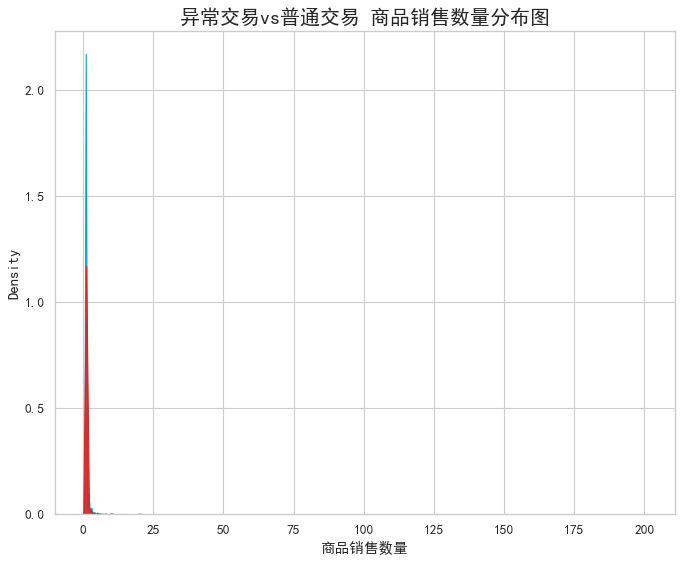

In [143]:
plt.figure(figsize=(10, 8), dpi=80)
sns.kdeplot(normal,
            shade=True,
            color="#01a2d9",
            label="普通交易",
            alpha=.5)
sns.kdeplot(ab,
            shade=True,
            color="#dc2624",
            label="异常交易",
            alpha=.9)

#风格与装饰
sns.set(style="whitegrid",font="SimHei", font_scale=1.1)
plt.title("异常交易vs普通交易 商品销售数量分布图",fontsize=18)
#plt.yticks([])
#plt.ylim((0,0.0000002))
plt.show()

从分布图来看，一笔交易中下单20个以上商品的多是异常交易，但20个商品以下的交易中，普通交易与异常交易的差异并不明显。从describe的结果来看也是如此，普通交易与异常交易中99%都是一次下单5个商品以下的订单。从这个角度来说，很可能“商品销售数量”这个特征对于模型的预测来说并无帮助。因此，我们对这个特征执行简单二值化操作——销售数量大于25的，是高风险交易，标注为1，反之则是低风险交易，标注为0。

#### step2：是否新增特征

In [144]:
train['销量分箱'] = 0
test['销量分箱'] = 0
train.loc[train['商品销售数量']>25, '销量分箱'] = 1
test.loc[test['商品销售数量']>25, '销量分箱'] = 1